## Cleaning Dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../../data/processed/addeddraft.csv')

In [3]:
data.head()

,Unnamed: 0,year,playername,team,age,draft,attempts,yards_run,tds_run,longgain_run,...,catchpercent,yards_rec,yardsperrec,tds_rec,firstdowns,longgain_rec,yardspertarget,recpergame,yardspergame_rec,fumbles
0,0,2020,Aaron Jones,GNB,26,182,75,389,5,75,...,73.30%,261,7.9,2,12,30,5.8,3.7,29.0,2
1,1,2019,Aaron Jones,GNB,25,182,236,1084,16,56,...,72.10%,474,9.7,3,18,67,7.0,3.1,29.6,3
2,2,2018,Aaron Jones,GNB,24,182,133,728,8,67,...,74.30%,206,7.9,1,12,24,5.9,2.2,17.2,1
3,3,2017,Aaron Jones,GNB,23,7,81,448,4,46,...,50.00%,22,2.4,0,2,9,1.2,0.8,1.8,0
4,4,2020,Adrian Peterson,DET,35,7,80,314,2,27,...,68.80%,78,7.1,0,3,18,4.9,1.0,7.1,0


In [4]:
data.columns

Index(['Unnamed: 0', 'year', 'playername', 'team', 'age', 'draft', 'attempts',
       'yards_run', 'tds_run', 'longgain_run', 'yardsperatt',
       'yardspergame_run', 'basesalarycap (10^8)', 'Percenthit (%)',
       'caphit (M)', 'cashspent (M)', 'g', 'gs', 'tgt', 'rec', 'catchpercent',
       'yards_rec', 'yardsperrec', 'tds_rec', 'firstdowns', 'longgain_rec',
       'yardspertarget', 'recpergame', 'yardspergame_rec', 'fumbles'],
      dtype='object')

In [5]:
data = data.drop('Unnamed: 0',axis=1)
data = data.drop('playername', axis=1)
data = data.drop('team', axis=1)
data = data.drop('basesalarycap (10^8)',axis=1)
data = data.drop('cashspent (M)',axis=1)
data = data.drop('caphit (M)',axis=1)
data = data.drop('catchpercent',axis=1)
data = data.drop('longgain_run',axis=1)
data = data.drop('longgain_rec',axis=1)

In [6]:
y_val = data['Percenthit (%)']

In [7]:
x_data = data.drop('Percenthit (%)',axis=1)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_val,test_size=0.3)

## Scaling data

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [12]:
scaler.fit(x_train)

/home/brian/anaconda3/envs/tfdeeplearning/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [13]:
x_train = pd.DataFrame(data=scaler.transform(x_train),
                       columns=x_train.columns,index=x_train.index)
x_test = pd.DataFrame(data=scaler.transform(x_test),
                      columns=x_test.columns,index=x_test.index)

## Creating Featuring Columns

In [14]:
data.columns

Index(['year', 'age', 'draft', 'attempts', 'yards_run', 'tds_run',
       'yardsperatt', 'yardspergame_run', 'Percenthit (%)', 'g', 'gs', 'tgt',
       'rec', 'yards_rec', 'yardsperrec', 'tds_rec', 'firstdowns',
       'yardspertarget', 'recpergame', 'yardspergame_rec', 'fumbles'],
      dtype='object')

In [15]:
import tensorflow as tf

In [16]:
year = tf.feature_column.numeric_column('year')
age = tf.feature_column.numeric_column('age')
draft = tf.feature_column.numeric_column('draft')
attempts = tf.feature_column.numeric_column('attempts')
runyards = tf.feature_column.numeric_column('yards_run')
runtds = tf.feature_column.numeric_column('tds_run')
ypa = tf.feature_column.numeric_column('yardsperatt')
ypgrun = tf.feature_column.numeric_column('yardspergame_run')
games = tf.feature_column.numeric_column('g')
started = tf.feature_column.numeric_column('gs')
targets = tf.feature_column.numeric_column('tgt')
receptions = tf.feature_column.numeric_column('rec')
recyards = tf.feature_column.numeric_column('yards_rec')
ypr = tf.feature_column.numeric_column('yardsperrec')
rectds = tf.feature_column.numeric_column('tds_rec')
firstdown = tf.feature_column.numeric_column('firstdowns')
ypt = tf.feature_column.numeric_column('yardspertarget')
rpg = tf.feature_column.numeric_column('recpergame')
ypgrec = tf.feature_column.numeric_column('yardspergame_rec')
fum = tf.feature_column.numeric_column('fumbles')

In [17]:
feat_cols = [year,age,draft,attempts,runyards,runtds,ypa,ypgrun,games,started,
            targets,receptions,recyards,ypr,rectds,firstdown,ypt,rpg,ypgrec,fum]

In [18]:
input_func = tf.estimator.inputs.pandas_input_fn(x=x_train,y=y_train,
                                                batch_size=10,
                                                num_epochs=1000,
                                                shuffle=True)

In [19]:
model = tf.estimator.DNNRegressor(hidden_units=[20,20,20],feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_tf_random_seed': 1, '_session_config': None, '_log_step_count_steps': 100, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_keep_checkpoint_every_n_hours': 10000, '_keep_checkpoint_max': 5, '_save_checkpoints_steps': None, '_model_dir': '/tmp/tmpnkt6s8cn'}


In [20]:
model.train(input_fn=input_func,steps=20000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpnkt6s8cn/model.ckpt.
INFO:tensorflow:loss = 32.63097, step = 1
INFO:tensorflow:global_step/sec: 622.004
INFO:tensorflow:loss = 6.263534, step = 101 (0.164 sec)
INFO:tensorflow:global_step/sec: 670.63
INFO:tensorflow:loss = 51.92212, step = 201 (0.148 sec)
INFO:tensorflow:global_step/sec: 702.471
INFO:tensorflow:loss = 22.447954, step = 301 (0.144 sec)
INFO:tensorflow:global_step/sec: 727.611
INFO:tensorflow:loss = 22.220394, step = 401 (0.136 sec)
INFO:tensorflow:global_step/sec: 687.443
INFO:tensorflow:loss = 10.612509, step = 501 (0.146 sec)
INFO:tensorflow:global_step/sec: 770.56
INFO:tensorflow:loss = 15.851544, step = 601 (0.130 sec)
INFO:tensorflow:global_step/sec: 759.462
INFO:tensorflow:loss = 4.4977736, step = 701 (0.131 sec)
INFO:tensorflow:global_step/sec: 658.859
INFO:tensorflow:loss = 9.3628435, step = 801 (0.152 sec)
INFO:tensorflow:global_step/sec: 687.346
INFO:tensorflow:lo

INFO:tensorflow:global_step/sec: 592.551
INFO:tensorflow:loss = 7.6570597, step = 8301 (0.168 sec)
INFO:tensorflow:global_step/sec: 726.315
INFO:tensorflow:loss = 5.3080935, step = 8401 (0.137 sec)
INFO:tensorflow:global_step/sec: 707.953
INFO:tensorflow:loss = 7.4593124, step = 8501 (0.141 sec)
INFO:tensorflow:global_step/sec: 655.147
INFO:tensorflow:loss = 1.5390513, step = 8601 (0.153 sec)
INFO:tensorflow:global_step/sec: 637.228
INFO:tensorflow:loss = 5.666442, step = 8701 (0.156 sec)
INFO:tensorflow:global_step/sec: 649.535
INFO:tensorflow:loss = 2.2632442, step = 8801 (0.155 sec)
INFO:tensorflow:global_step/sec: 617.194
INFO:tensorflow:loss = 2.2414804, step = 8901 (0.162 sec)
INFO:tensorflow:global_step/sec: 800.168
INFO:tensorflow:loss = 5.5133142, step = 9001 (0.125 sec)
INFO:tensorflow:global_step/sec: 733.164
INFO:tensorflow:loss = 2.8000224, step = 9101 (0.136 sec)
INFO:tensorflow:global_step/sec: 610.817
INFO:tensorflow:loss = 1.5278268, step = 9201 (0.164 sec)
INFO:tensor

INFO:tensorflow:global_step/sec: 600.688
INFO:tensorflow:loss = 1.3863909, step = 16601 (0.167 sec)
INFO:tensorflow:global_step/sec: 589.657
INFO:tensorflow:loss = 20.740723, step = 16701 (0.170 sec)
INFO:tensorflow:global_step/sec: 537.215
INFO:tensorflow:loss = 5.9212613, step = 16801 (0.185 sec)
INFO:tensorflow:global_step/sec: 670.329
INFO:tensorflow:loss = 4.7902937, step = 16901 (0.150 sec)
INFO:tensorflow:global_step/sec: 742.167
INFO:tensorflow:loss = 0.87333775, step = 17001 (0.135 sec)
INFO:tensorflow:global_step/sec: 648.715
INFO:tensorflow:loss = 5.3462343, step = 17101 (0.154 sec)
INFO:tensorflow:global_step/sec: 715.662
INFO:tensorflow:loss = 6.8316607, step = 17201 (0.140 sec)
INFO:tensorflow:global_step/sec: 521.661
INFO:tensorflow:loss = 4.2712793, step = 17301 (0.192 sec)
INFO:tensorflow:global_step/sec: 548.329
INFO:tensorflow:loss = 2.2641382, step = 17401 (0.182 sec)
INFO:tensorflow:global_step/sec: 693.949
INFO:tensorflow:loss = 5.920765, step = 17501 (0.144 sec)


In [21]:
predict_input_func = tf.estimator.inputs.pandas_input_fn(x=x_test,
                                                        batch_size=10,
                                                        num_epochs=1,
                                                        shuffle=False)

In [22]:
pred_gen = model.predict(predict_input_func)

In [23]:
predictions = list(pred_gen)

INFO:tensorflow:Restoring parameters from /tmp/tmpnkt6s8cn/model.ckpt-20000


In [24]:
predictions

[{'predictions': array([4.39749], dtype=float32)},
 {'predictions': array([0.24010192], dtype=float32)},
 {'predictions': array([1.3627095], dtype=float32)},
 {'predictions': array([0.5303968], dtype=float32)},
 {'predictions': array([4.0743203], dtype=float32)},
 {'predictions': array([1.2892791], dtype=float32)},
 {'predictions': array([0.36626267], dtype=float32)},
 {'predictions': array([1.1547872], dtype=float32)},
 {'predictions': array([1.3035321], dtype=float32)},
 {'predictions': array([0.5315497], dtype=float32)},
 {'predictions': array([0.27242225], dtype=float32)},
 {'predictions': array([0.17617206], dtype=float32)},
 {'predictions': array([0.67228466], dtype=float32)},
 {'predictions': array([3.8125277], dtype=float32)},
 {'predictions': array([0.4417832], dtype=float32)},
 {'predictions': array([11.487263], dtype=float32)},
 {'predictions': array([0.36882472], dtype=float32)},
 {'predictions': array([2.43752], dtype=float32)},
 {'predictions': array([-1.3886586], dtype=f

In [25]:
final_preds = []

for pred in predictions:
    final_preds.append(pred['predictions'])

In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
mean_squared_error(y_test,final_preds)**0.5

1.5849354081810838

In [28]:
final_preds

[array([4.39749], dtype=float32),
 array([0.24010192], dtype=float32),
 array([1.3627095], dtype=float32),
 array([0.5303968], dtype=float32),
 array([4.0743203], dtype=float32),
 array([1.2892791], dtype=float32),
 array([0.36626267], dtype=float32),
 array([1.1547872], dtype=float32),
 array([1.3035321], dtype=float32),
 array([0.5315497], dtype=float32),
 array([0.27242225], dtype=float32),
 array([0.17617206], dtype=float32),
 array([0.67228466], dtype=float32),
 array([3.8125277], dtype=float32),
 array([0.4417832], dtype=float32),
 array([11.487263], dtype=float32),
 array([0.36882472], dtype=float32),
 array([2.43752], dtype=float32),
 array([-1.3886586], dtype=float32),
 array([1.1623536], dtype=float32),
 array([0.24736746], dtype=float32),
 array([1.145934], dtype=float32),
 array([0.5975464], dtype=float32),
 array([0.45641398], dtype=float32),
 array([0.48072672], dtype=float32),
 array([0.43983555], dtype=float32),
 array([0.7415163], dtype=float32),
 array([0.8092886], dt

In [30]:
pred_total = 0
test_total = 0

for pred in final_preds:
    pred_total = pred_total + pred[0]
    
for test in y_test.values:
    test_total = test_total + test

In [31]:
y_test_values = y_test.values
total_error = 0
percent_error = 0

for i in range(0,len(final_preds)):
    true_error = final_preds[i][0] - y_test_values[i] 
    print(true_error)
    total_error = total_error + true_error
    if not (y_test_values[i] == 0):
        percent_error = percent_error + ((true_error / y_test_values[i]) / len(final_preds))


2.4781712085666507
-0.10116275242185213
0.9358879142473144
0.09956867511468509
1.4981626553146974
0.6591978022791137
-0.48775220366833494
0.4371839308079223
-2.4635858364343264
0.24649602615393063
0.012575100085540802
-0.21843153024536893
-0.45156854827645865
3.0812776565551756
0.016666136773559603
2.1735372358300786
0.03412438138269047
-6.624007472839354
-1.7670642937688599
0.7135906168342896
0.012748294555366524
-1.0298993472898559
0.28340080063967893
-0.301137369701294
0.1509746739025879
0.0012070244008789421
0.2937362720951843
0.060785626948791416
-0.07291949483148197
-0.31576929849151614
0.1878239834448852
0.15669022972711183
-0.4903407625195313
-1.0098230544153748
-0.6383615296090392
-0.7441078031790771
-0.684911551413574
1.553540168938965
3.2213502937891847
-1.4733849615169374
-0.4259781196626282
-1.1142799919766235
0.09329516082287592
-0.03727326890399141
1.279615032914856
-1.2555897524796142
0.12035972618466184
-0.7221673360535279
0.6636056191479492
-0.18780208388104247
-1.284

In [32]:
print("combined error: ")
print(total_error)
print("combined error / # of entries: ")
print(total_error/(len(final_preds)))
print("percent error: ")
print(percent_error)

combined error: 
-27.004266345919245
combined error / # of entries: 
-0.14919484169016156
percent error: 
0.6201277711452124


In [33]:
from sklearn.metrics import explained_variance_score

In [34]:
explained_variance_score(y_test, final_preds)

0.3359615435664145

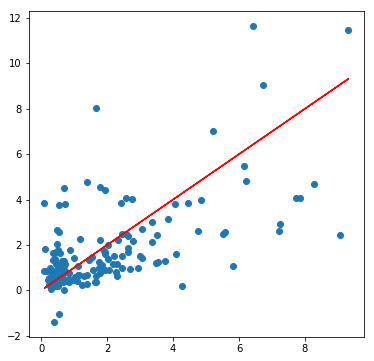

In [35]:
plt.figure(figsize=(6,6))
plt.scatter(y_test,final_preds)
plt.plot(y_test,y_test,'r')